### Data Visualization For Windspeed

In [642]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

In [643]:
# LOAD FROM CSV TO PANDAS
real_wind_df = pd.read_csv('real-data/real_windspeed.csv')

# SHOW DATA
real_wind_df.head(5)

,PCTimeStamp,HD01_Ambient WindSpeed Avg. (1),HD02_Ambient WindSpeed Avg. (2),HD03_Ambient WindSpeed Avg. (3),HD04_Ambient WindSpeed Avg. (4),HD05_Ambient WindSpeed Avg. (5),HD06_Ambient WindSpeed Avg. (6),HD07_Ambient WindSpeed Avg. (7),HD08_Ambient WindSpeed Avg. (8)
0,2024-04-01 0:00:00+07:00,4.293,3.012,4.535,3.637,4.395,3.758,3.484,3.262
1,2024-04-01 0:10:00+07:00,3.566,1.5,3.102,2.543,3.117,3.23,2.574,2.766
2,2024-04-01 0:20:00+07:00,3.898,1.965,1.863,2.402,2.41,2.215,1.832,2.148
3,2024-04-01 0:30:00+07:00,3.762,3.242,2.824,3.008,2.254,2.461,2.258,2.207
4,2024-04-01 0:40:00+07:00,3.691,3.902,2.176,3.512,2.387,3.168,3.094,2.207


In [644]:
# PREPROCESS: CONVERT DATETIME TYPE, TIMEZONE, NUMERIC TYPE

# Convert to PCTimeStamp field to datetime type
real_wind_df['PCTimeStamp'] = pd.to_datetime(real_wind_df['PCTimeStamp'])

# Convert from Local Timezone to UTC
real_wind_df['PCTimeStamp'] = real_wind_df['PCTimeStamp'].dt.tz_convert('UTC')

# Convert some columns to numeric type
numeric_columns = ['HD01_Ambient WindSpeed Avg. (1)', 'HD02_Ambient WindSpeed Avg. (2)', 'HD03_Ambient WindSpeed Avg. (3)', 'HD04_Ambient WindSpeed Avg. (4)', 'HD05_Ambient WindSpeed Avg. (5)', 'HD06_Ambient WindSpeed Avg. (6)', 'HD07_Ambient WindSpeed Avg. (7)', 'HD08_Ambient WindSpeed Avg. (8)']
real_wind_df[numeric_columns] = real_wind_df[numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [645]:
# CHECK DATA AFTER PREPROCESSING
real_wind_df.head(5)

,PCTimeStamp,HD01_Ambient WindSpeed Avg. (1),HD02_Ambient WindSpeed Avg. (2),HD03_Ambient WindSpeed Avg. (3),HD04_Ambient WindSpeed Avg. (4),HD05_Ambient WindSpeed Avg. (5),HD06_Ambient WindSpeed Avg. (6),HD07_Ambient WindSpeed Avg. (7),HD08_Ambient WindSpeed Avg. (8)
0,2024-03-31 17:00:00+00:00,4.293,3.012,4.535,3.637,4.395,3.758,3.484,3.262
1,2024-03-31 17:10:00+00:00,3.566,1.500,3.102,2.543,3.117,3.230,2.574,2.766
2,2024-03-31 17:20:00+00:00,3.898,1.965,1.863,2.402,2.410,2.215,1.832,2.148
3,2024-03-31 17:30:00+00:00,3.762,3.242,2.824,3.008,2.254,2.461,2.258,2.207
4,2024-03-31 17:40:00+00:00,3.691,3.902,2.176,3.512,2.387,3.168,3.094,2.207


In [646]:
# CHECK TYPE OF ALL COLUMNS
real_wind_df.dtypes

PCTimeStamp                        datetime64[ns, UTC]
HD01_Ambient WindSpeed Avg. (1)                float64
HD02_Ambient WindSpeed Avg. (2)                float64
HD03_Ambient WindSpeed Avg. (3)                float64
HD04_Ambient WindSpeed Avg. (4)                float64
HD05_Ambient WindSpeed Avg. (5)                float64
HD06_Ambient WindSpeed Avg. (6)                float64
HD07_Ambient WindSpeed Avg. (7)                float64
HD08_Ambient WindSpeed Avg. (8)                float64
dtype: object

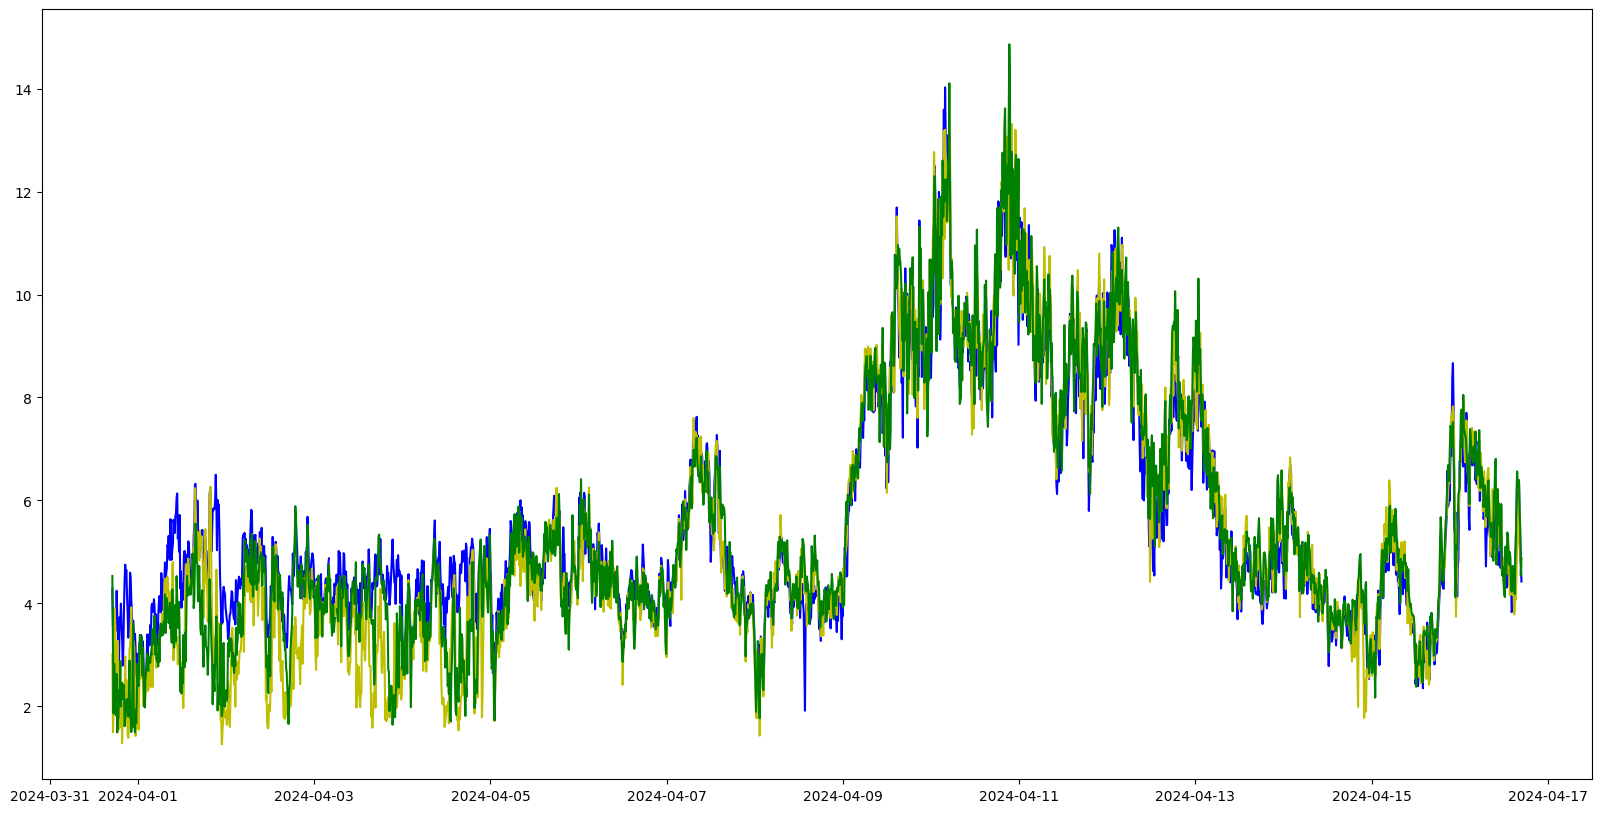

In [647]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(20, 10))
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD01_Ambient WindSpeed Avg. (1)"], "b")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD02_Ambient WindSpeed Avg. (2)"], "y")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD03_Ambient WindSpeed Avg. (3)"], "g")
plt.show()

### Data Visualization For Glass Forecast API

In [648]:
# LOAD FROM CSV TO PANDAS
glass_wind_df = pd.read_csv('csv/glass_forecast_100m.csv')

# SHOW DATA
glass_wind_df.head(5)

,time,noaa,sg
0,2024-04-04T00:00:00+00:00,3.35,3.35
1,2024-04-04T01:00:00+00:00,3.75,3.75
2,2024-04-04T02:00:00+00:00,4.16,4.16
3,2024-04-04T03:00:00+00:00,4.56,4.56
4,2024-04-04T04:00:00+00:00,5.05,5.05


In [649]:
# PREPROCESS: CONVERT DATETIME TYPE, TIMEZONE, NUMERIC TYPE

# Convert to time field to datetime type
glass_wind_df['time'] = pd.to_datetime(glass_wind_df['time'])

# Convert some columns to numeric type
numeric_columns = ['noaa', 'sg']
glass_wind_df[numeric_columns] = glass_wind_df[numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [650]:
# Set time field as index 
glass_wind_df.set_index('time', inplace=True)
glass_wind_df.head(5)

,noaa,sg
time,,
2024-04-04 00:00:00+00:00,3.35,3.35
2024-04-04 01:00:00+00:00,3.75,3.75
2024-04-04 02:00:00+00:00,4.16,4.16
2024-04-04 03:00:00+00:00,4.56,4.56
2024-04-04 04:00:00+00:00,5.05,5.05


In [651]:
glass_wind_df.index

DatetimeIndex(['2024-04-04 00:00:00+00:00', '2024-04-04 01:00:00+00:00',
               '2024-04-04 02:00:00+00:00', '2024-04-04 03:00:00+00:00',
               '2024-04-04 04:00:00+00:00', '2024-04-04 05:00:00+00:00',
               '2024-04-04 06:00:00+00:00', '2024-04-04 07:00:00+00:00',
               '2024-04-04 08:00:00+00:00', '2024-04-04 09:00:00+00:00',
               ...
               '2024-04-17 14:00:00+00:00', '2024-04-17 15:00:00+00:00',
               '2024-04-17 16:00:00+00:00', '2024-04-17 17:00:00+00:00',
               '2024-04-17 18:00:00+00:00', '2024-04-17 19:00:00+00:00',
               '2024-04-17 20:00:00+00:00', '2024-04-17 21:00:00+00:00',
               '2024-04-17 22:00:00+00:00', '2024-04-17 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=336, freq=None)

In [652]:
# Resample with 10-minute frequency and perform linear interpolation
glass_wind_df = glass_wind_df.resample('10T').interpolate(method='linear')
glass_wind_df.head(5)

/var/folders/3m/lrfnnq890n55hk28xnx6hswc0000gn/T/ipykernel_9573/1205144806.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  glass_wind_df = glass_wind_df.resample('10T').interpolate(method='linear')


,noaa,sg
time,,
2024-04-04 00:00:00+00:00,3.350000,3.350000
2024-04-04 00:10:00+00:00,3.416667,3.416667
2024-04-04 00:20:00+00:00,3.483333,3.483333
2024-04-04 00:30:00+00:00,3.550000,3.550000
2024-04-04 00:40:00+00:00,3.616667,3.616667


In [653]:
# Reset index to get 'time' back as a column
glass_wind_df.reset_index(inplace=True)
glass_wind_df.head(5)

,time,noaa,sg
0,2024-04-04 00:00:00+00:00,3.350000,3.350000
1,2024-04-04 00:10:00+00:00,3.416667,3.416667
2,2024-04-04 00:20:00+00:00,3.483333,3.483333
3,2024-04-04 00:30:00+00:00,3.550000,3.550000
4,2024-04-04 00:40:00+00:00,3.616667,3.616667


In [654]:
# CHECK TYPE OF ALL COLUMNS
glass_wind_df.dtypes

time    datetime64[ns, UTC]
noaa                float64
sg                  float64
dtype: object

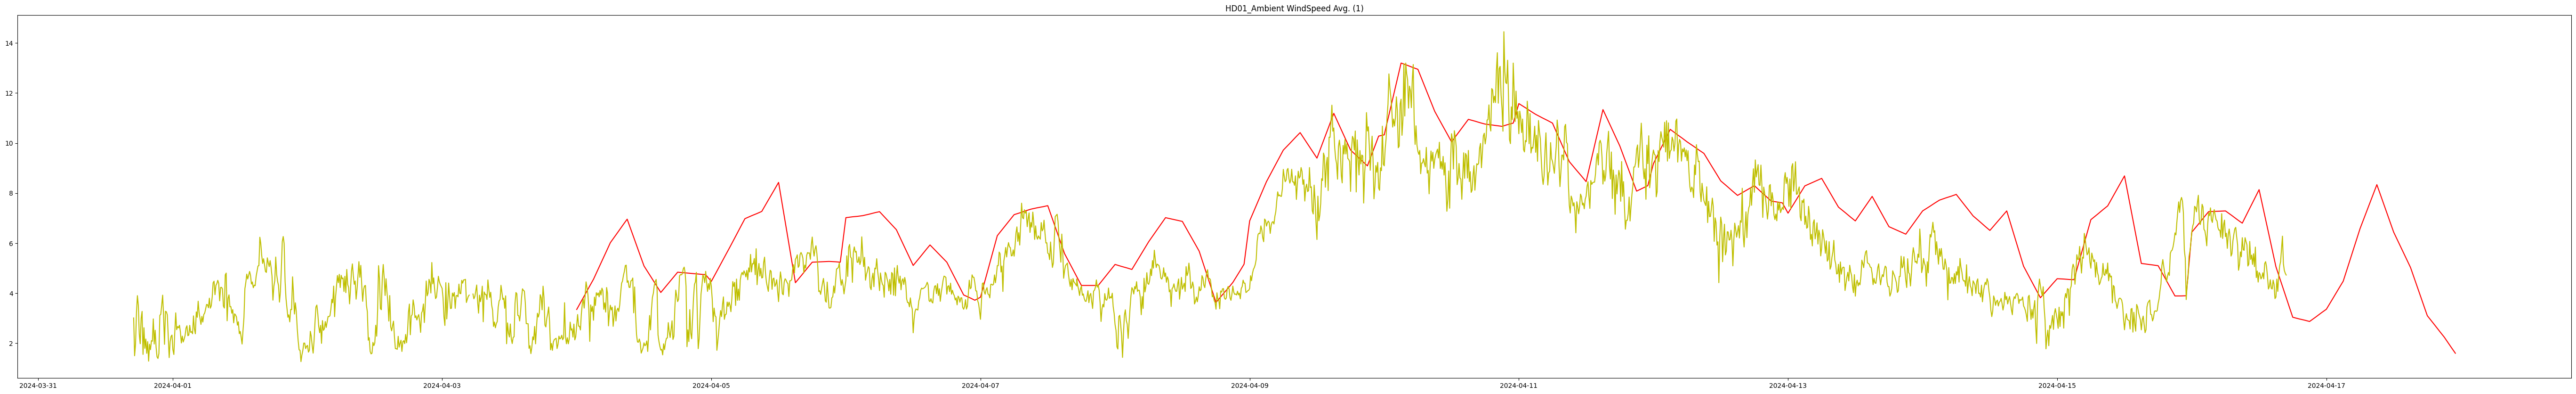

In [655]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"], "r")
# plt.plot(glass_wind_df["time"], glass_wind_df["sg"], "r")

# plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD01_Ambient WindSpeed Avg. (1)"], "y")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD02_Ambient WindSpeed Avg. (2)"], "y")
# plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD03_Ambient WindSpeed Avg. (3)"], "g")
# plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD04_Ambient WindSpeed Avg. (4)"], "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [656]:
# Filter realtime data from 2024-04-04 00:00:00+00:00 to 2024-04-16 16:50:00+00:00
real_wind_df = real_wind_df[real_wind_df["PCTimeStamp"] >= "2024-04-04 00:00:00+00:00"]
real_wind_df

,PCTimeStamp,HD01_Ambient WindSpeed Avg. (1),HD02_Ambient WindSpeed Avg. (2),HD03_Ambient WindSpeed Avg. (3),HD04_Ambient WindSpeed Avg. (4),HD05_Ambient WindSpeed Avg. (5),HD06_Ambient WindSpeed Avg. (6),HD07_Ambient WindSpeed Avg. (7),HD08_Ambient WindSpeed Avg. (8)
474,2024-04-04 00:00:00+00:00,3.445,2.730,2.723,2.145,2.996,2.672,2.941,3.324
475,2024-04-04 00:10:00+00:00,3.109,3.148,3.293,3.375,2.789,2.637,3.152,3.063
476,2024-04-04 00:20:00+00:00,2.793,2.684,2.609,2.918,2.445,2.938,2.820,2.457
477,2024-04-04 00:30:00+00:00,2.977,2.680,2.641,2.918,2.270,2.598,2.313,2.277
478,2024-04-04 00:40:00+00:00,2.609,2.531,2.617,2.527,2.840,2.539,2.316,2.492
...,...,...,...,...,...,...,...,...,...
2299,2024-04-16 16:10:00+00:00,6.391,6.281,6.395,6.145,5.570,5.563,5.777,6.043
2300,2024-04-16 16:20:00+00:00,5.691,5.180,5.773,5.602,5.578,5.156,5.461,5.848
2301,2024-04-16 16:30:00+00:00,5.273,4.910,5.484,4.902,5.121,5.047,4.891,5.098
2302,2024-04-16 16:40:00+00:00,4.852,4.797,4.547,4.355,4.516,5.277,5.594,5.434


In [657]:
# Filter glass-forecast data from 2024-04-04 00:00:00+00:00 to 2024-04-16 16:50:00+00:00
glass_wind_df = glass_wind_df[glass_wind_df["time"] <= "2024-04-16 16:50:00+00:00"]
glass_wind_df

,time,noaa,sg
0,2024-04-04 00:00:00+00:00,3.350000,3.350000
1,2024-04-04 00:10:00+00:00,3.416667,3.416667
2,2024-04-04 00:20:00+00:00,3.483333,3.483333
3,2024-04-04 00:30:00+00:00,3.550000,3.550000
4,2024-04-04 00:40:00+00:00,3.616667,3.616667
...,...,...,...
1825,2024-04-16 16:10:00+00:00,4.276667,4.276667
1826,2024-04-16 16:20:00+00:00,4.163333,4.163333
1827,2024-04-16 16:30:00+00:00,4.050000,4.050000
1828,2024-04-16 16:40:00+00:00,3.936667,3.936667


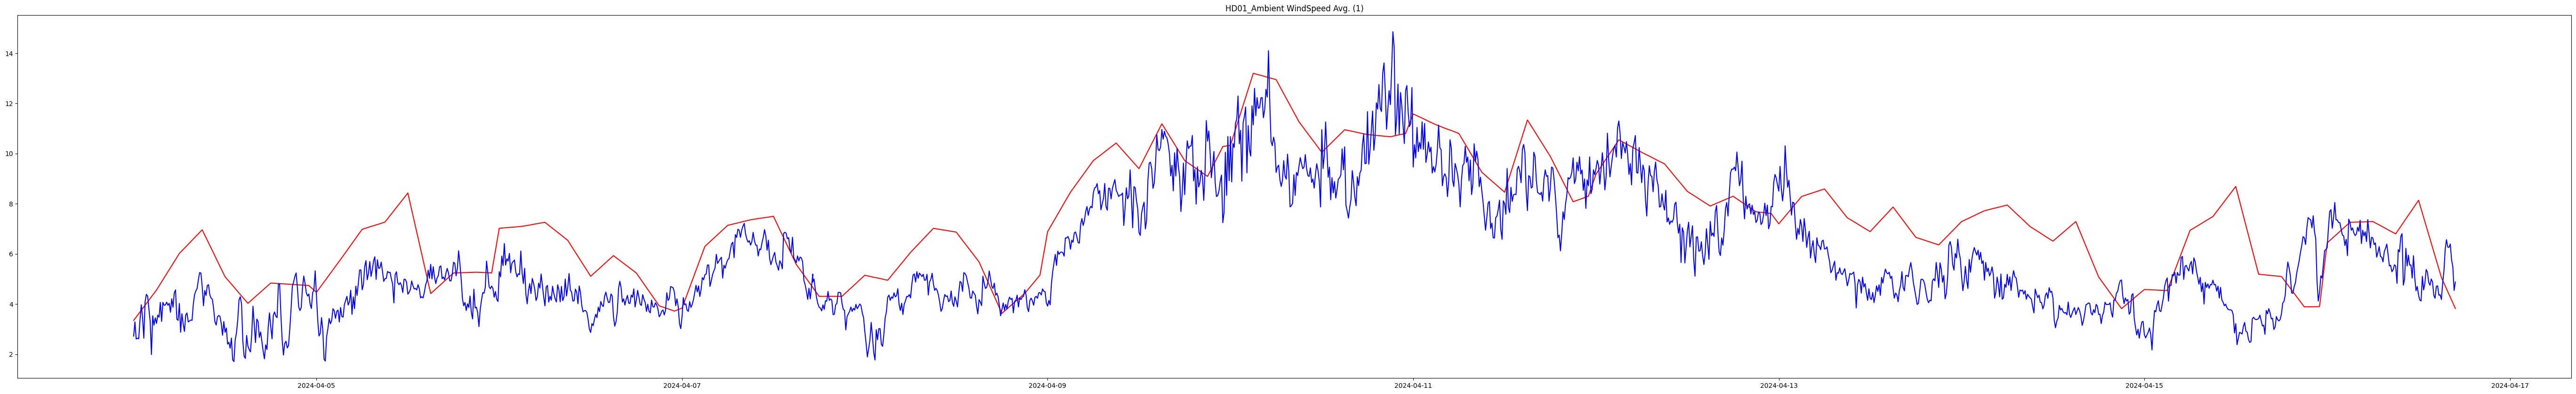

In [658]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"], "r")

plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD03_Ambient WindSpeed Avg. (3)"], "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [659]:
print(len(glass_wind_df))
print(len(real_wind_df))

1830
1830


In [660]:
# CHOOSE ACTUAL WINDSPEEDS

actual_windspeeds = np.array(real_wind_df["HD01_Ambient WindSpeed Avg. (1)"])
# actual_windspeeds = np.array(real_wind_df["HD02_Ambient WindSpeed Avg. (2)"])
# actual_windspeeds = np.array(real_wind_df["HD03_Ambient WindSpeed Avg. (3)"])
# actual_windspeeds = np.array(real_wind_df["HD04_Ambient WindSpeed Avg. (4)"])
# actual_windspeeds = np.array(real_wind_df["HD05_Ambient WindSpeed Avg. (5)"])
# actual_windspeeds = np.array(real_wind_df["HD06_Ambient WindSpeed Avg. (6)"])
# actual_windspeeds = np.array(real_wind_df["HD07_Ambient WindSpeed Avg. (7)"])
# actual_windspeeds = np.array(real_wind_df["HD08_Ambient WindSpeed Avg. (8)"])


# CHOOSE PREDICTED WINDSPEED
predicted_windspeeds = np.array(glass_wind_df["noaa"])

In [661]:
# MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED VS ACTUAL_WINSPEED

print("===== MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse_1 = mean_squared_error(actual_windspeeds, predicted_windspeeds)
print("Mean Squared Error (MSE):", windspeed_mse_1)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds)
windspeed_mape_1 = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds)
print("Mean Absolute Percentage Error (MAPE):", windspeed_mape_1)

===== MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 3.557143286278081
Mean Absolute Percentage Error (MAPE): 32.32146733283302


In [662]:
# Minus raw-forecast windspeed by 1.5
predicted_windspeeds_minus_1_5 = predicted_windspeeds-1.5

In [663]:
# MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED

print("===== MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse_2 = mean_squared_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("Mean Squared Error (MSE):", windspeed_mse_2)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape_2 = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("Mean Absolute Percentage Error (MAPE):", windspeed_mape_2)

===== MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.7108334502125073
Mean Absolute Percentage Error (MAPE): 19.996371751632676


===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED 



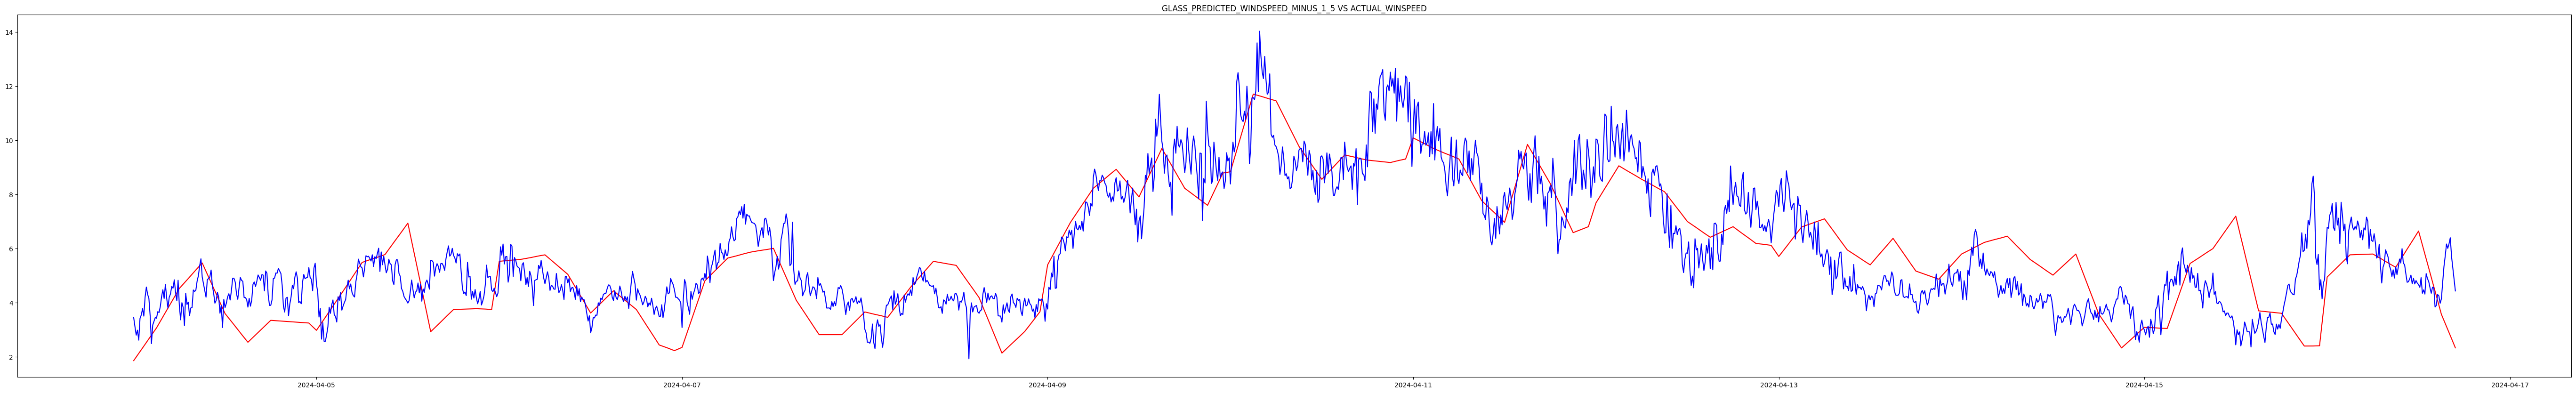

In [664]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED \n")

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], predicted_windspeeds_minus_1_5, "r")

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED")
plt.show()

In [665]:
print("actual_windspeeds = ", actual_windspeeds)
print("predicted_windspeeds = ", predicted_windspeeds)
print("predicted_windspeeds_minus_1_5 = ", predicted_windspeeds_minus_1_5)

actual_windspeeds =  [3.445 3.109 2.793 ... 5.273 4.852 4.426]
predicted_windspeeds =  [3.35       3.41666667 3.48333333 ... 4.05       3.93666667 3.82333333]
predicted_windspeeds_minus_1_5 =  [1.85       1.91666667 1.98333333 ... 2.55       2.43666667 2.32333333]


In [666]:
print("===== MEASURE: DIFFERENCE BETWEEN predicted_windspeeds VS actual_windspeeds \n")

difference = predicted_windspeeds - actual_windspeeds
print("difference.sum() = ", difference.sum())
print("predicted_windspeeds.shape[0] = ", predicted_windspeeds.shape[0])
print("Average Difference = ", difference.sum() / predicted_windspeeds.shape[0])

===== MEASURE: DIFFERENCE BETWEEN predicted_windspeeds VS actual_windspeeds 

difference.sum() =  2498.749
predicted_windspeeds.shape[0] =  1830
Average Difference =  1.3654366120218577


In [667]:
# ADJUST FORECASTING BY DIFFERENCE WINDOW ALGORITHM 

print("========= ADJUST FORECASTING BY DIFFERENCE WINDOW ALGORITHM \n")

# actual_windspeeds
glass_predicted_windspeeds = predicted_windspeeds
# glass_predicted_windspeeds = predicted_windspeeds_minus_1_5

adjust_windspeeds = []
past_window_length = 40
future_window_length = 20
array_length = glass_predicted_windspeeds.shape[0]

print("array_length = ", array_length)

def get_average_difference(source_array, start_index, stop_index):
    return source_array[start_index:stop_index].sum()

adjust_windspeeds += list(actual_windspeeds[:past_window_length])
print(adjust_windspeeds)

difference = np.array(glass_predicted_windspeeds[:past_window_length]) - np.array(adjust_windspeeds)

print("difference = ", difference)
print("===== len(adjust_windspeeds) = ", len(adjust_windspeeds))

print(list(range(past_window_length, array_length, future_window_length)))

for index in range(past_window_length, array_length, future_window_length):
    tempo_diff_average = get_average_difference(difference, index-past_window_length, index) / past_window_length
    # test_diff = (tempo_diff_average + 1.5) / 2
    # test_diff = 1.5
    test_diff = tempo_diff_average

    if index + future_window_length < array_length:
        adjust_windspeeds += list(glass_predicted_windspeeds[index:index+future_window_length]-test_diff)
        difference = np.array(glass_predicted_windspeeds[:index + future_window_length]) - np.array(adjust_windspeeds)[:index + future_window_length]
    else: 
        adjust_windspeeds += list(glass_predicted_windspeeds[index:array_length]-test_diff)
        difference = np.array(glass_predicted_windspeeds[:index + future_window_length]) - np.array(adjust_windspeeds)[:index + future_window_length]
    
    print("===== len(adjust_windspeeds) = ", len(adjust_windspeeds))
    print("tempo_diff_average = ", tempo_diff_average)

print("glass_predicted_windspeeds = ", glass_predicted_windspeeds)
print("adjust_windspeeds = ", adjust_windspeeds)
print("len(adjust_windspeeds) = ", len(adjust_windspeeds))

========= ADJUST FORECASTING BY DIFFERENCE WINDOW ALGORITHM 

array_length =  1830
[3.445, 3.109, 2.793, 2.977, 2.609, 3.41, 3.539, 3.773, 3.496, 4.195, 4.57, 4.301, 4.145, 3.5, 2.48, 3.164, 3.305, 3.441, 3.418, 3.66, 3.629, 3.855, 4.215, 4.469, 4.148, 4.668, 4.16, 3.793, 4.191, 4.316, 4.598, 4.527, 4.836, 4.375, 4.066, 4.82, 3.875, 3.359, 3.992, 3.813]
difference =  [-0.095       0.30766667  0.69033333  0.573       1.00766667  0.27333333
  0.211       0.04533333  0.39066667 -0.24       -0.54666667 -0.20933333
  0.015       0.72666667  1.81333333  1.196       1.12166667  1.05233333
  1.142       0.98166667  1.09433333  0.95        0.67166667  0.49933333
  0.902       0.462       1.05        1.497       1.179       1.134
  0.932       1.08466667  0.85733333  1.4         1.79066667  1.11833333
  2.145       2.71266667  2.13133333  2.362     ]
===== len(adjust_windspeeds) =  40
[40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480,

===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



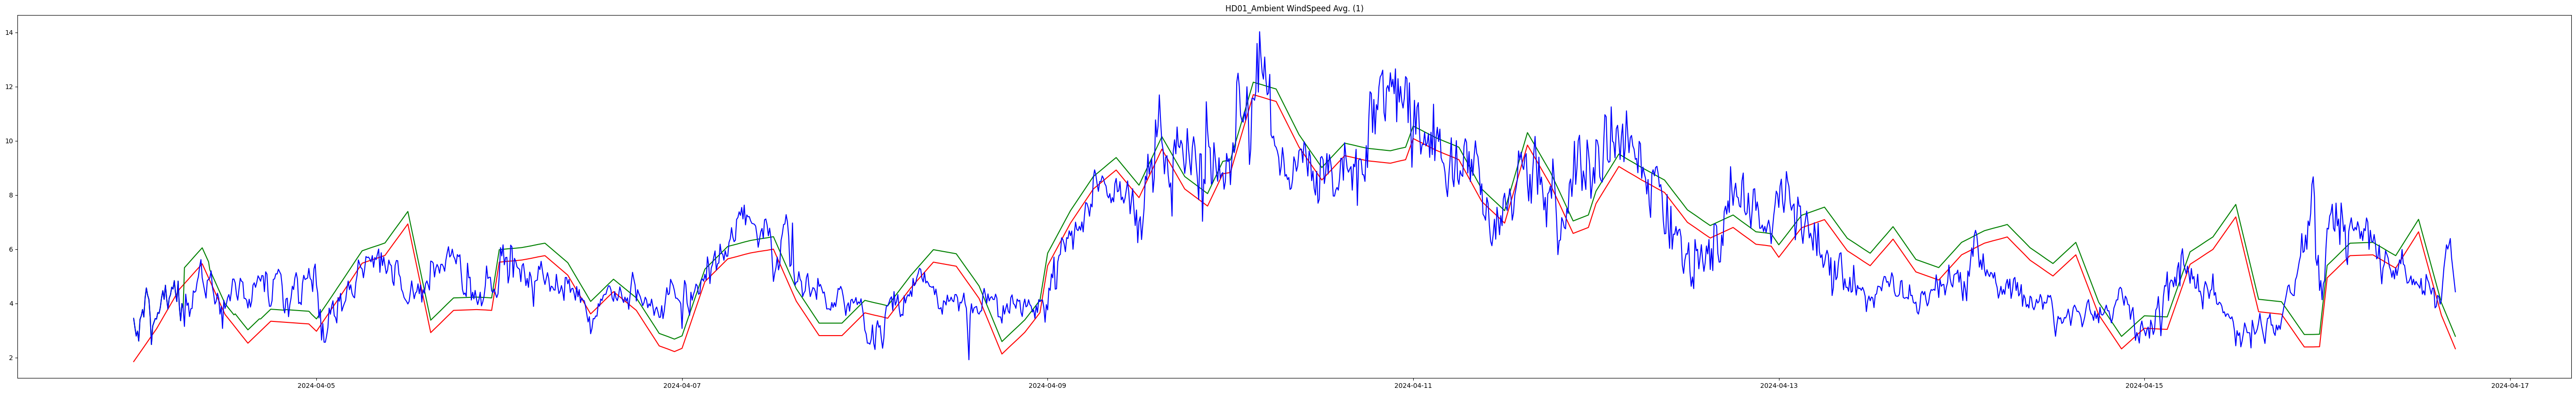

In [668]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

adjust_windspeeds = np.array(adjust_windspeeds)

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "r")
plt.plot(glass_wind_df["time"], adjust_windspeeds, "g") 

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [669]:
print("===== MEASURE ACCURARY BETWEEN: ADJUST_WINDSPEED VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

adjust_windspeeds = np.array(adjust_windspeeds)

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, adjust_windspeeds)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, adjust_windspeeds)
print("Mean Absolute Percentage Error (MAPE):", windspeed_mape)

===== MEASURE ACCURARY BETWEEN: ADJUST_WINDSPEED VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.7897220222901116
Mean Absolute Percentage Error (MAPE): 21.176197634537523


In [670]:
import numpy as np
from sklearn.metrics import mean_squared_error

adjust_windspeeds = np.array(adjust_windspeeds)

length = len(actual_windspeeds)

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, adjust_windspeeds)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# windspeed_mape = mean_absolute_percentage_error(actual_windspeeds[:length//2], adjust_windspeeds[:length//2])
windspeed_mape_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds[40:80], predicted_windspeeds_minus_1_5[40:80])
print("\nMAPE_GLASS_MINUS_1_5 = ", windspeed_mape_minus_1_5)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[40:80], adjust_windspeeds[40:80])
print("MAPE_GLASS_ADJUSTED = ", windspeed_mape_adjust)

windspeed_mape_minus_1_5_one_third_length = mean_absolute_percentage_error(actual_windspeeds[:length//3], predicted_windspeeds_minus_1_5[:length//3])
print("\nMAPE_GLASS_MINUS_1_5_ONE_THIRD_LENGTH = ", windspeed_mape_minus_1_5_one_third_length)

windspeed_mape_adjust_one_third_length = mean_absolute_percentage_error(actual_windspeeds[:length//3], adjust_windspeeds[:length//3])
print("MAPE_GLASS_ADJUSTED_ONE_THIRD_LENGTH = ", windspeed_mape_adjust_one_third_length)

windspeed_mape_minus_1_5_half_length = mean_absolute_percentage_error(actual_windspeeds[:length//2], predicted_windspeeds_minus_1_5[:length//2])
print("\nMAPE_GLASS_MINUS_1_5_HALF_LENGTH = ", windspeed_mape_minus_1_5_half_length)

windspeed_mape_adjust_half_length = mean_absolute_percentage_error(actual_windspeeds[:length//2], adjust_windspeeds[:length//2])
print("MAPE_GLASS_ADJUSTED_HALF_LENGTH = ", windspeed_mape_adjust_half_length)

windspeed_mape_minus_1_5_full = mean_absolute_percentage_error(actual_windspeeds[:], predicted_windspeeds_minus_1_5[:])
print("\nMAPE_GLASS_MINUS_1_5_FULL = ", windspeed_mape_minus_1_5_full)

windspeed_mape_adjust_full = mean_absolute_percentage_error(actual_windspeeds[:], adjust_windspeeds[:])
print("MAPE_GLASS_ADJUSTED_FULL = ", windspeed_mape_adjust_full)


Mean Squared Error (MSE): 1.7897220222901116

MAPE_GLASS_MINUS_1_5 =  14.97133211898445
MAPE_GLASS_ADJUSTED =  21.570296303021017

MAPE_GLASS_MINUS_1_5_ONE_THIRD_LENGTH =  19.561902262799546
MAPE_GLASS_ADJUSTED_ONE_THIRD_LENGTH =  17.51209598555018

MAPE_GLASS_MINUS_1_5_HALF_LENGTH =  18.131679393613233
MAPE_GLASS_ADJUSTED_HALF_LENGTH =  17.41631826687915

MAPE_GLASS_MINUS_1_5_FULL =  19.996371751632676
MAPE_GLASS_ADJUSTED_FULL =  21.176197634537523


### Data Visualization For Meteo Forecast API

In [671]:
# LOAD FROM CSV TO PANDAS
meteo_wind_df = pd.read_csv('csv/meteo_forcast_100m.csv')

# SHOW DATA
meteo_wind_df.head(5)

,time,meteo
0,2024-04-05T00:00:00+00:00,3.82
1,2024-04-05T01:00:00+00:00,4.27
2,2024-04-05T02:00:00+00:00,4.30
3,2024-04-05T03:00:00+00:00,4.56
4,2024-04-05T04:00:00+00:00,5.66


In [672]:
# PREPROCESS: CONVERT DATETIME TYPE, TIMEZONE, NUMERIC TYPE

# Convert to time field to datetime type
meteo_wind_df['time'] = pd.to_datetime(meteo_wind_df['time'])

# Convert some columns to numeric type
numeric_columns = ['meteo']
meteo_wind_df[numeric_columns] = meteo_wind_df[numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [673]:
# CHECK TYPE OF ALL COLUMNS
meteo_wind_df.dtypes

time     datetime64[ns, UTC]
meteo                float64
dtype: object

In [674]:
# SHOW DATA AFTER PREPROCESSING
meteo_wind_df.head(5)

,time,meteo
0,2024-04-05 00:00:00+00:00,3.82
1,2024-04-05 01:00:00+00:00,4.27
2,2024-04-05 02:00:00+00:00,4.30
3,2024-04-05 03:00:00+00:00,4.56
4,2024-04-05 04:00:00+00:00,5.66


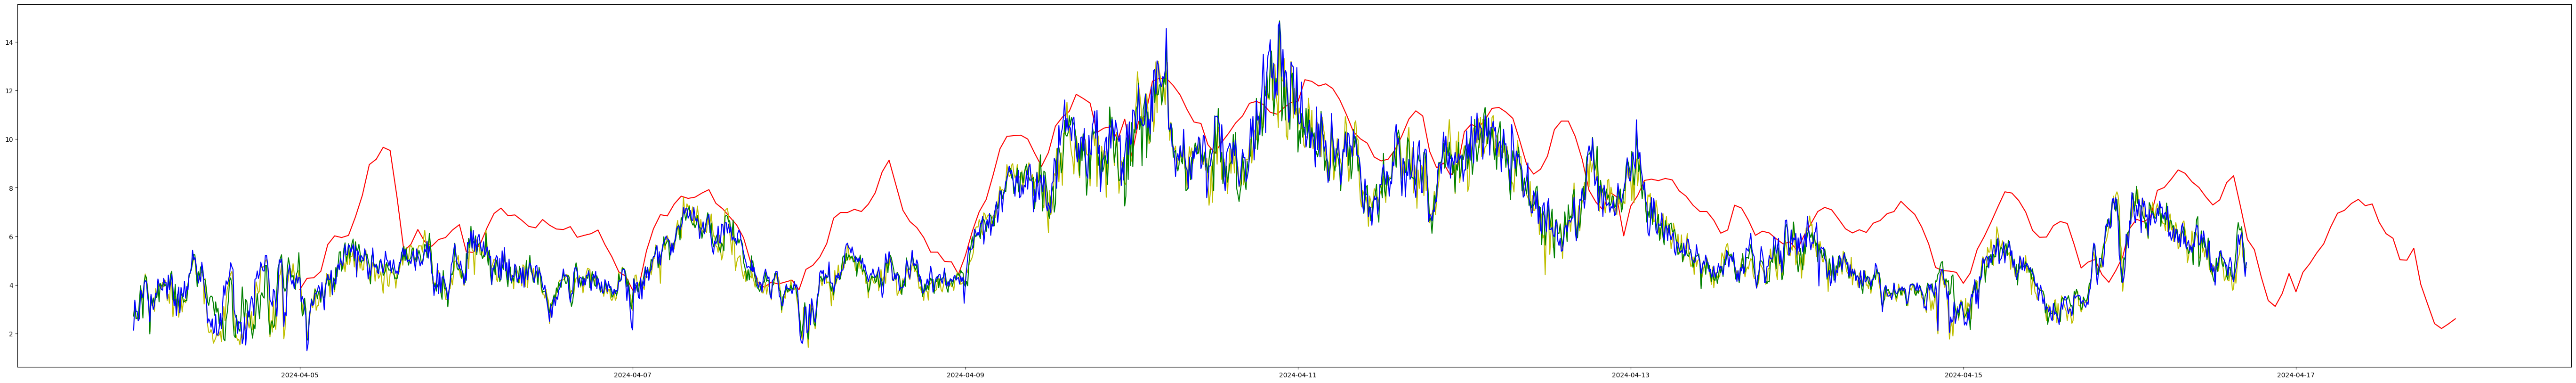

In [675]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(70, 10))
# plt.plot(meteo_wind_df["time"], meteo_wind_df["meteo"], "r")
plt.plot(meteo_wind_df["time"], meteo_wind_df["meteo"], "r")

plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD02_Ambient WindSpeed Avg. (2)"], "y")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD03_Ambient WindSpeed Avg. (3)"], "g")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD04_Ambient WindSpeed Avg. (4)"], "b")
plt.show()